In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

base_path = os.getcwd() 
file_name = "data/full_data.csv"
full_path = os.path.join(base_path, file_name)

data = pd.read_csv(full_path)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We do not need id or the last feature (includes NaN values)...

In [6]:
# clean data
df = data.drop(['id', 'Unnamed: 32'],axis = 1 )
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.shape

(569, 31)

In [7]:
# total number of null values within the dataset
df.isna().sum().sum()

0

In [8]:
# check if data is balanced
diagnosis_counts = df['diagnosis'].value_counts()
print(diagnosis_counts)

diagnosis
0    357
1    212
Name: count, dtype: int64


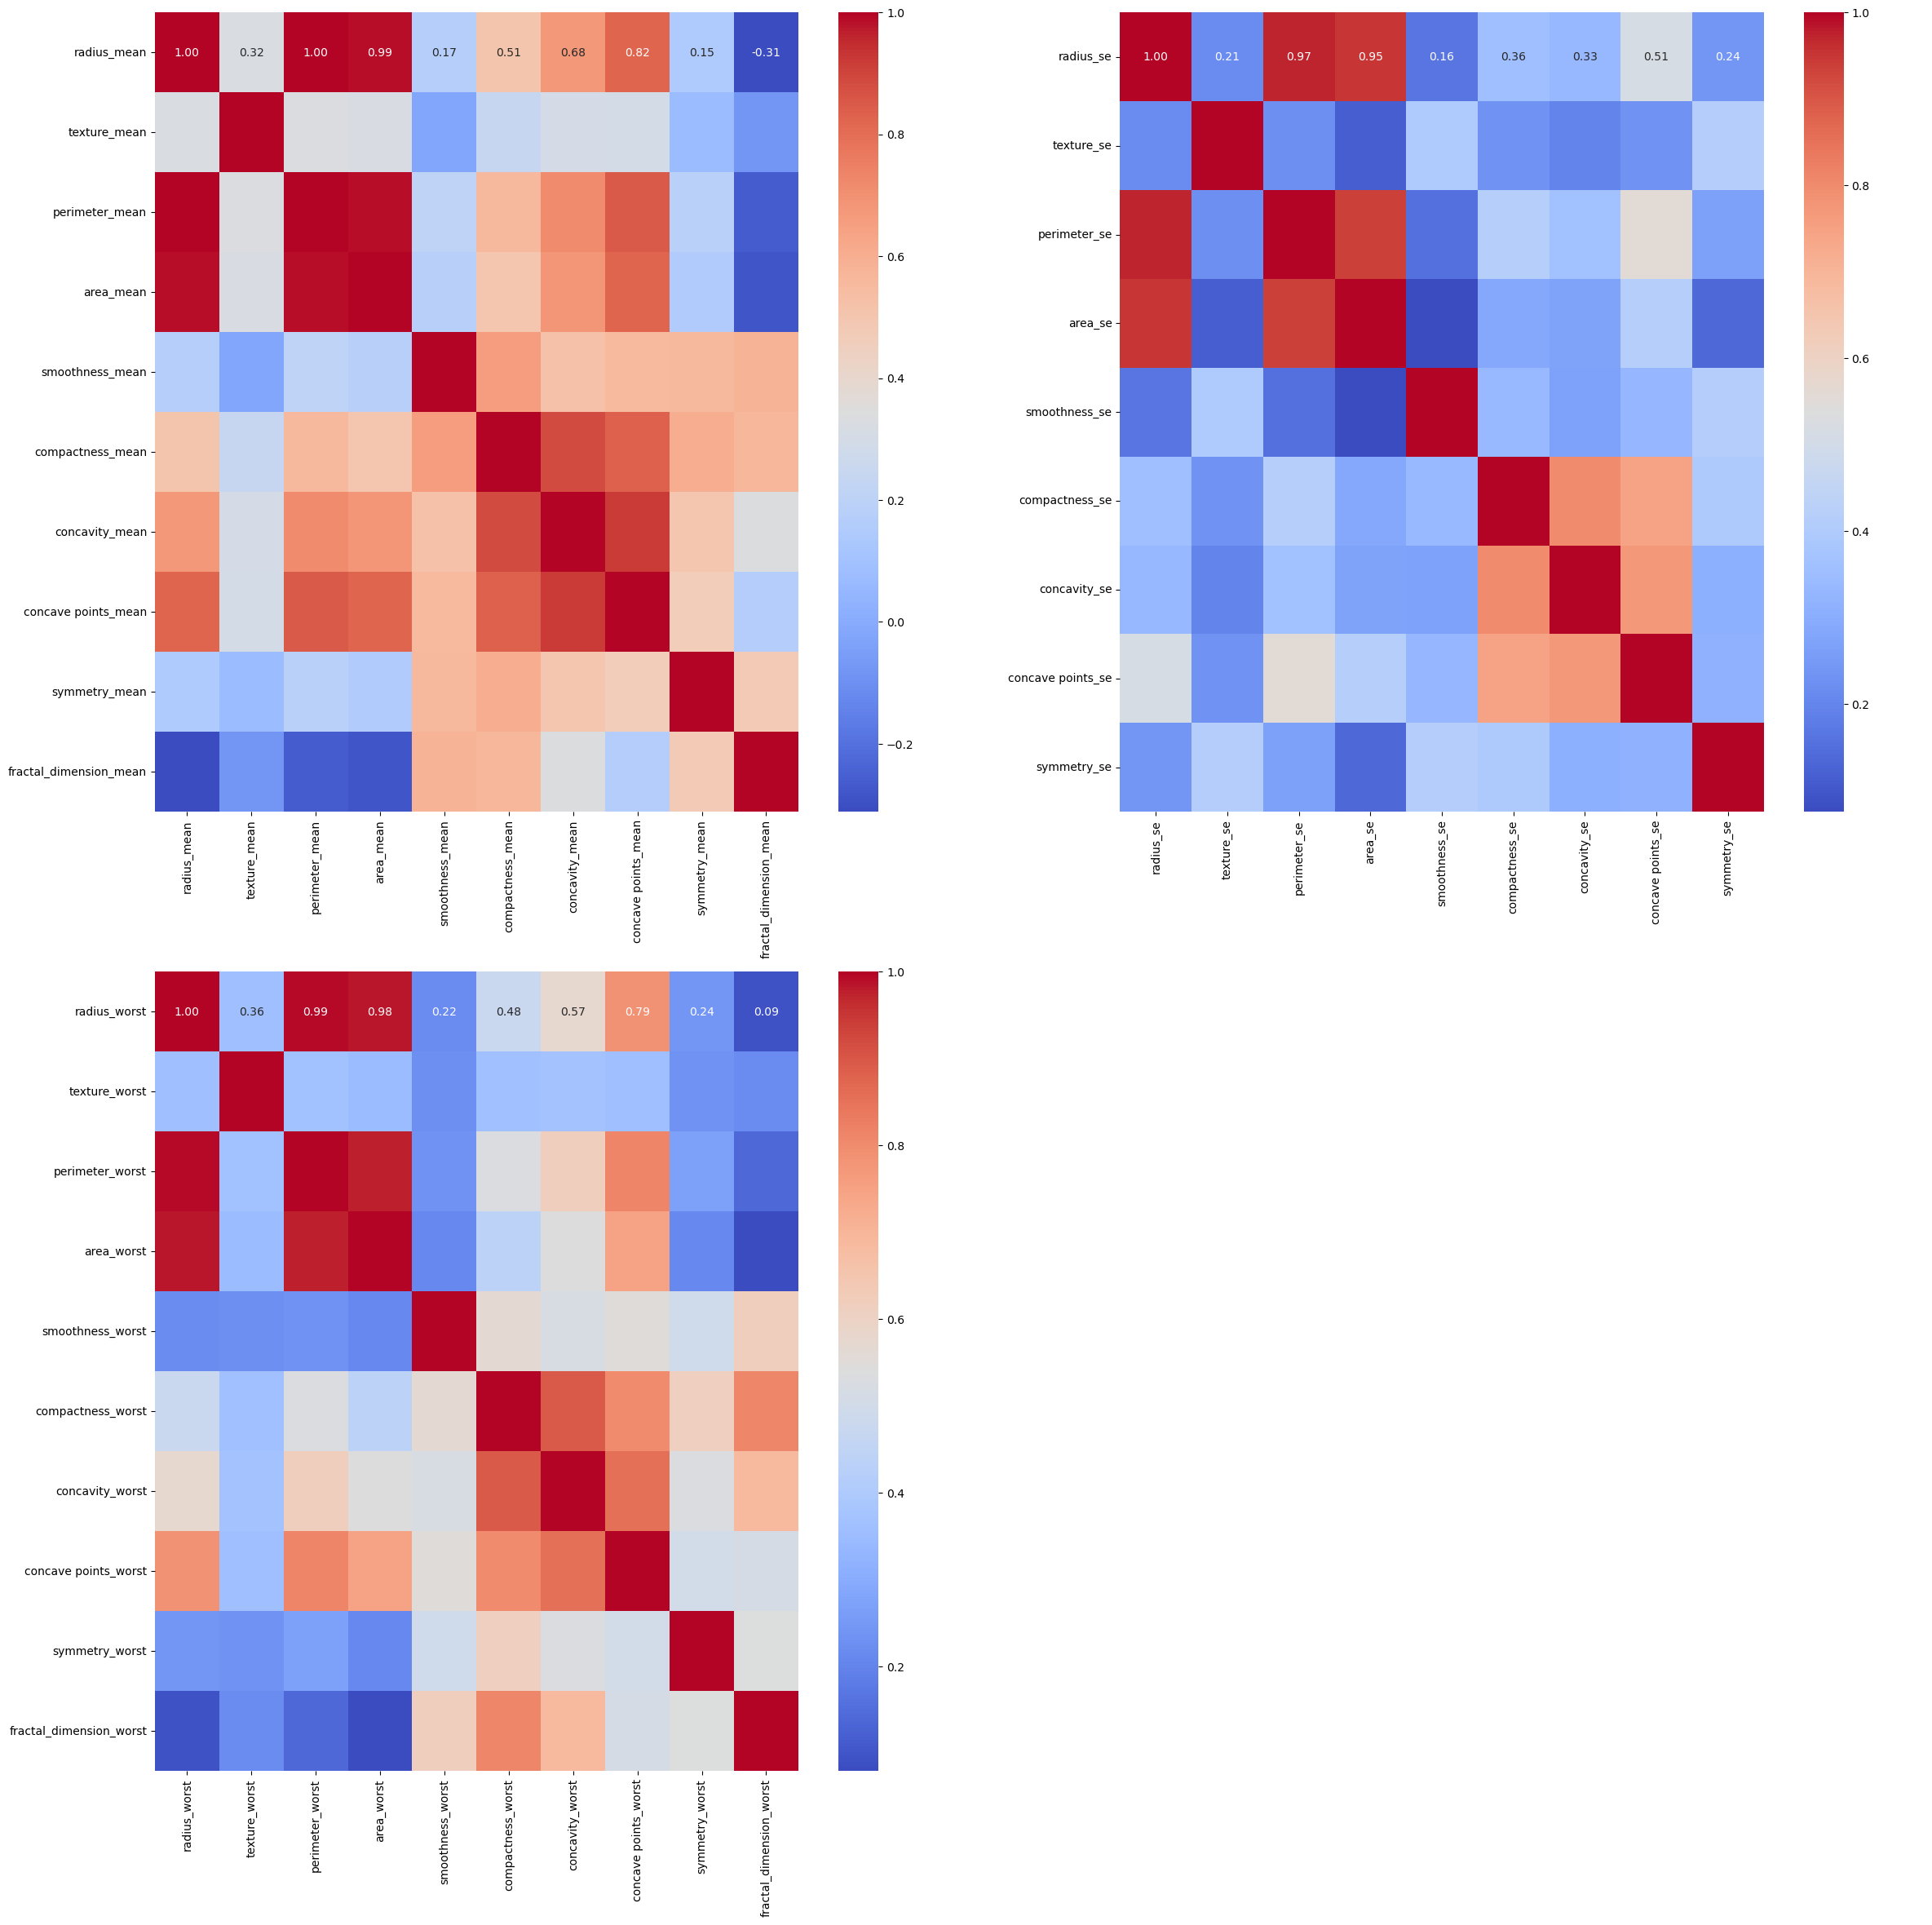

In [9]:
# heatmaps for correlation
f,axs = plt.subplots(nrows=2, ncols=2, figsize=(28, 28))
sns.heatmap(df[df.columns[1:11]].corr(), annot=True, fmt= '.2f', cmap = "coolwarm", ax=axs[0,0])
sns.heatmap(df[df.columns[11:20]].corr(), annot=True, fmt= '.2f', cmap = "coolwarm", ax=axs[0,1])
sns.heatmap(df[df.columns[21:31]].corr(), annot=True, fmt= '.2f', cmap = "coolwarm", ax=axs[1,0])
axs[1,1].set_axis_off()


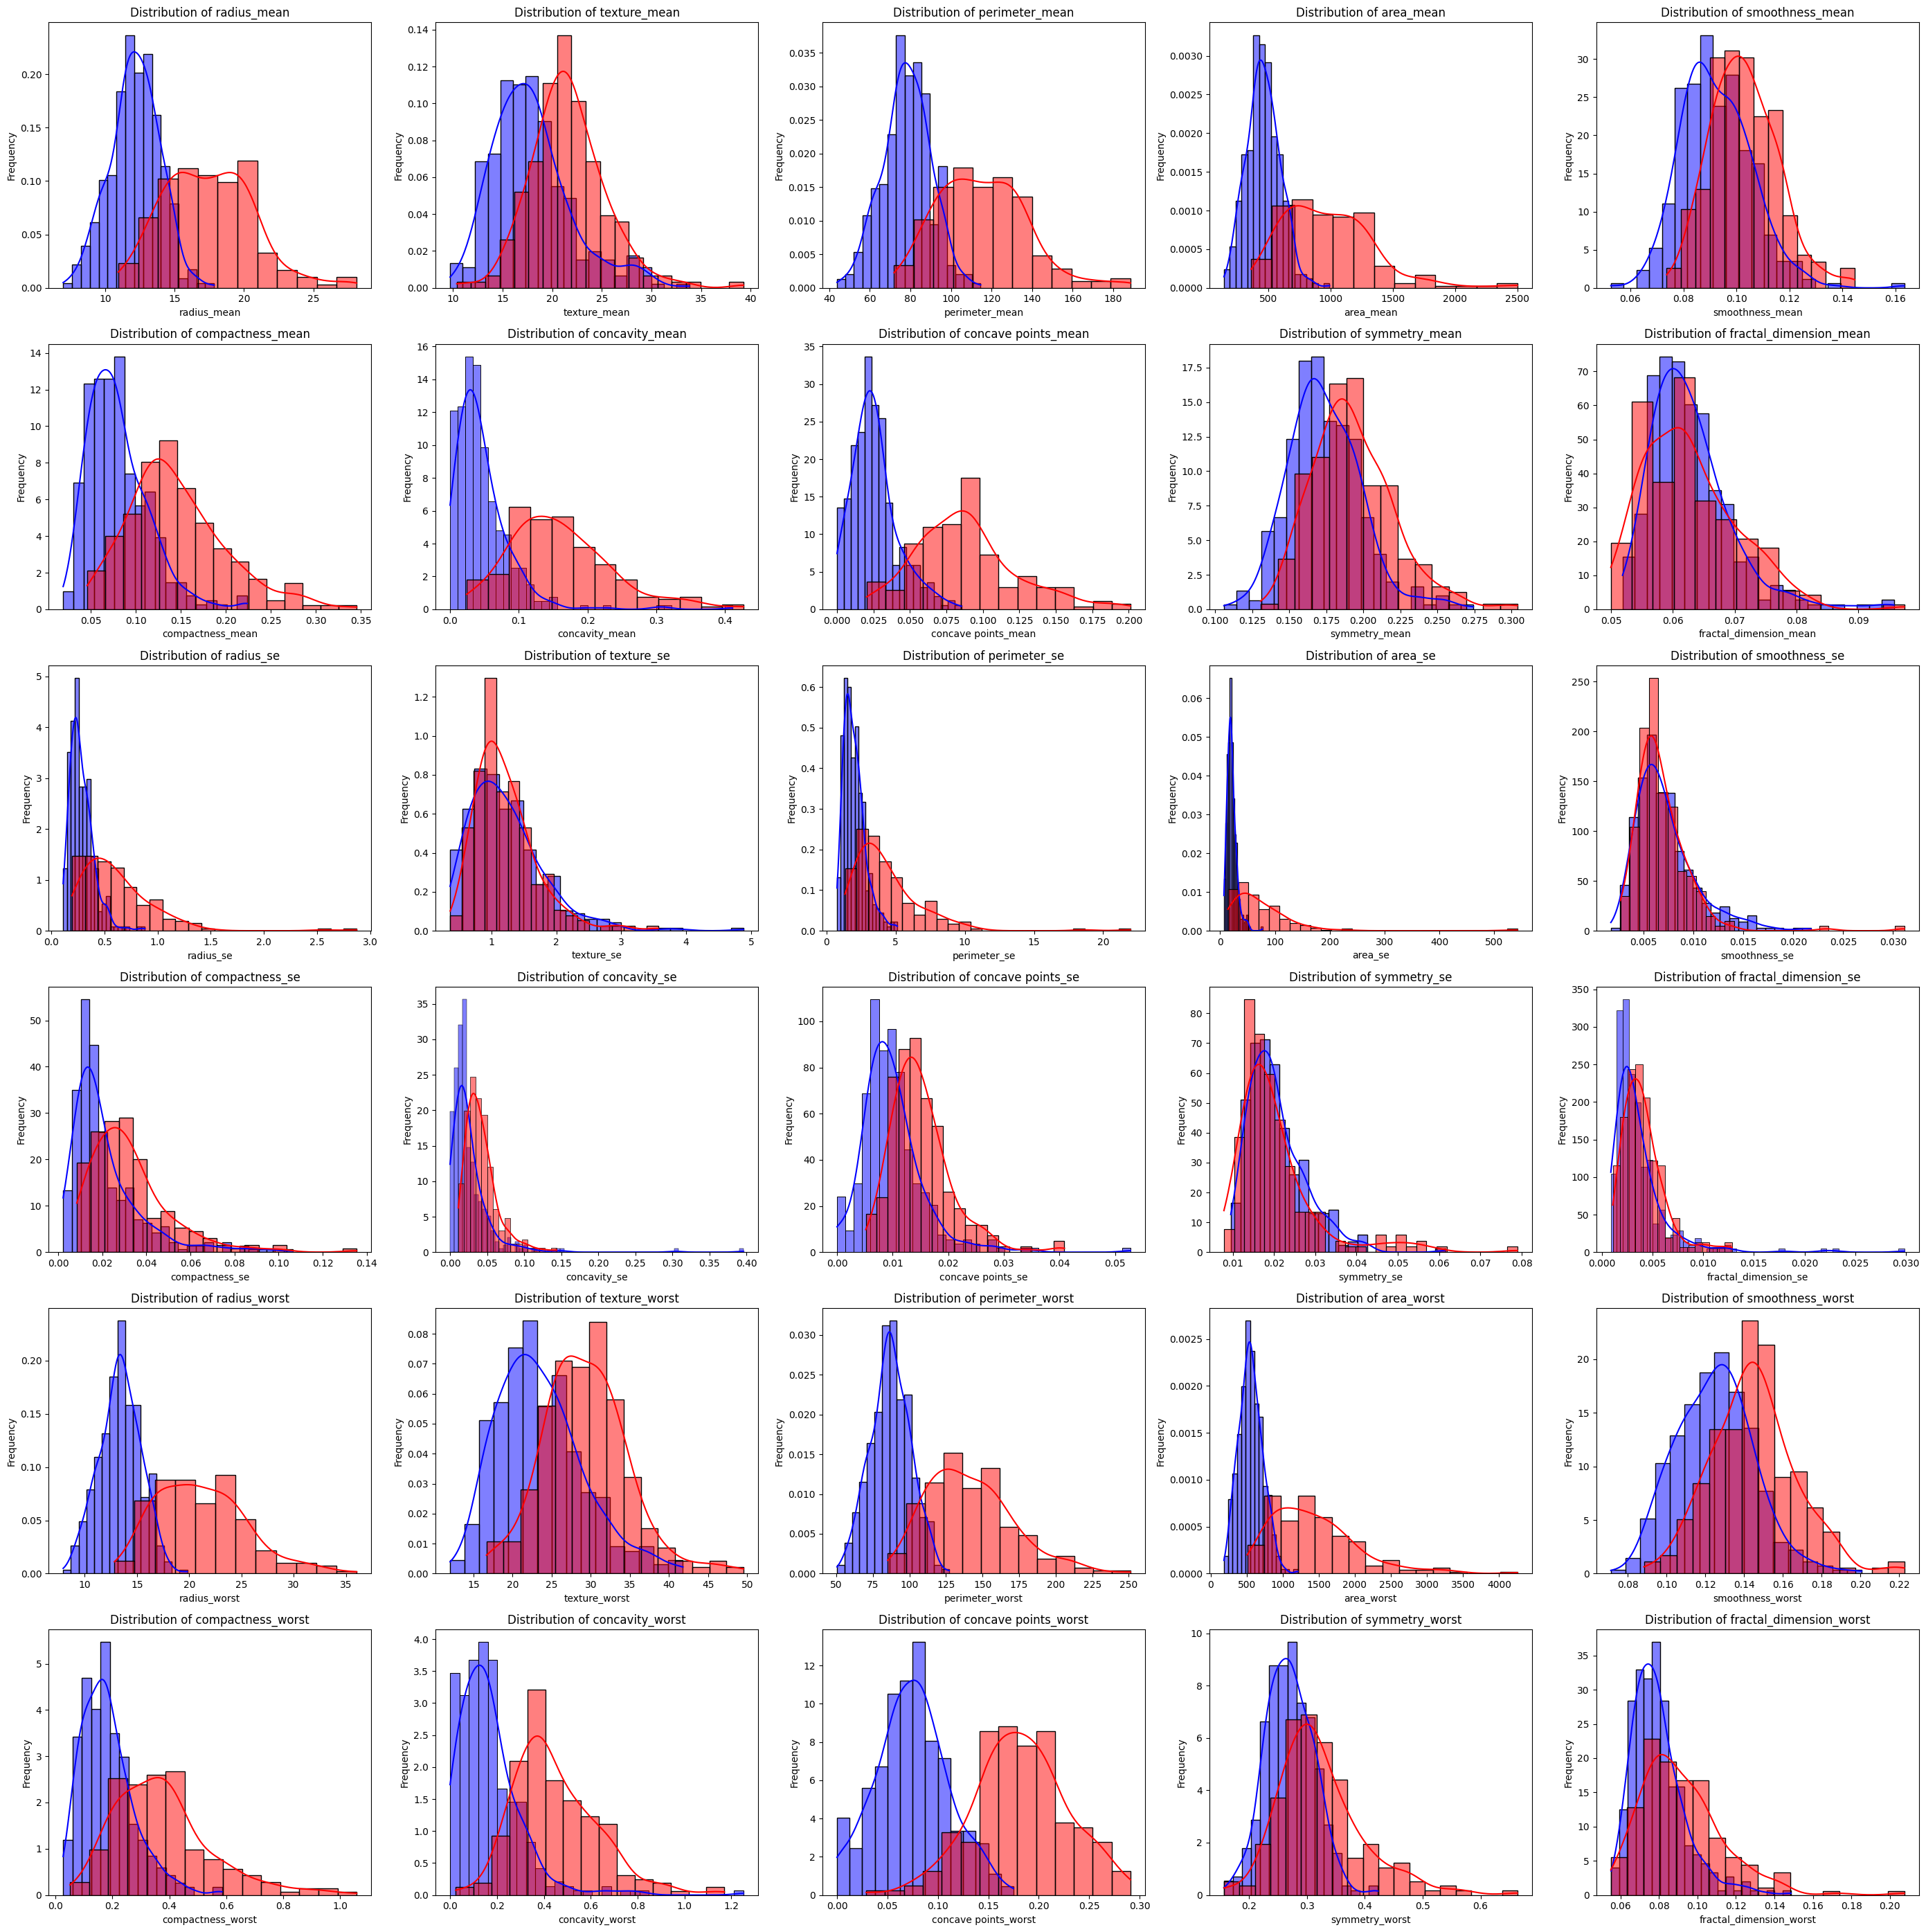

In [13]:
f,axs = plt.subplots(nrows=6, ncols=5, figsize=(28, 28))
axs = axs.flatten()
for i, column in enumerate(df.columns[1:]):
    sns.histplot(df[df['diagnosis'] == 0][column], kde=True, color='blue', ax=axs[i], label='0', stat="density", alpha=0.5)
    sns.histplot(df[df['diagnosis'] == 1][column], kde=True, color='red', ax=axs[i], label='1', stat="density", alpha=0.5)
    axs[i].set_title(f'Distribution of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

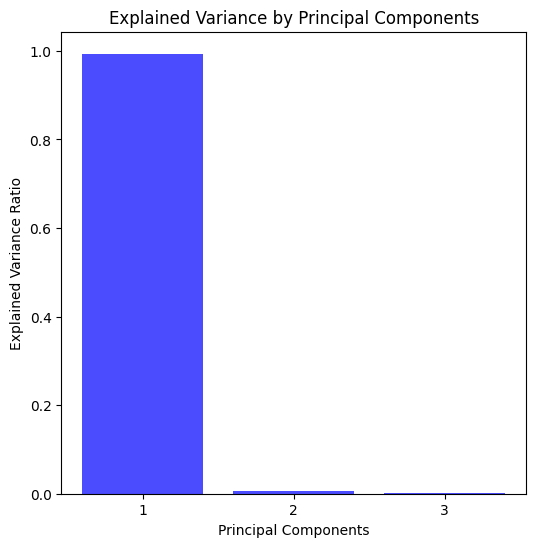

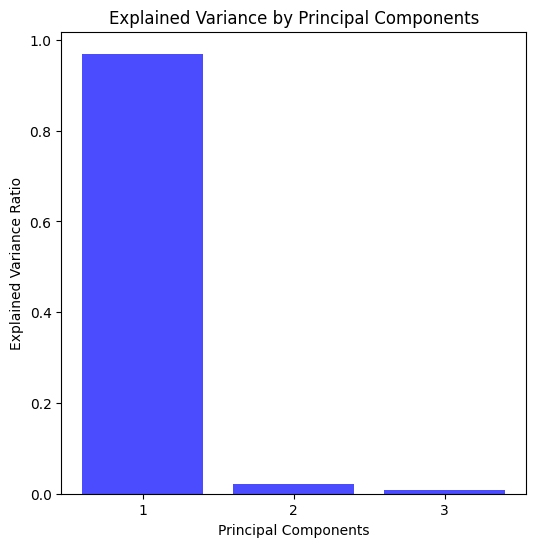

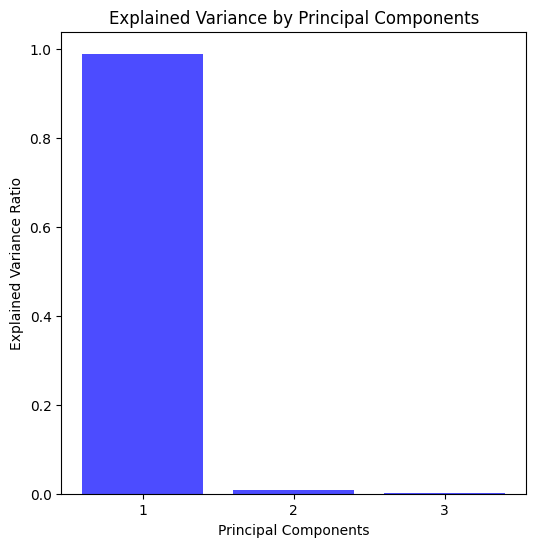

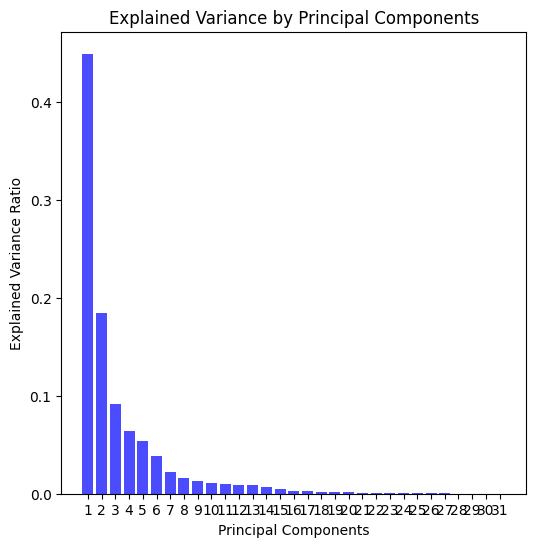

In [15]:
# PCA dimensionality reduction -> easier to train model with less dimensions 
# we could group variables 
column_mean = ['radius_mean', 'perimeter_mean', 'area_mean']
column_se = ['radius_se', 'perimeter_se', 'area_se']
column_worst = ['radius_worst', 'perimeter_worst', 'area_worst']

def pca(data, dimension, plot = False):
    data = (data-data.mean())/data.std() #data has mean = 0 and sd = 1 -> goodfor pca so that mean is centered
    cov = np.cov(data.T)
    eig_val, eig_vec = np.linalg.eig(cov)
    indices = np.arange(0,len(eig_val), 1)
    indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
    eig_val = eig_val[indices]
    eig_vec = eig_vec[:,indices]
    sum_eig_val = np.sum(eig_val)
    if plot:
        explained_variance = eig_val/ sum_eig_val
        plot_pca(explained_variance)
    pca_data = np.dot(data, eig_vec[:,0:dimension])
    return pca_data

def plot_pca(explained_variance):
    plt.figure(figsize=(6, 6))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', color='b')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Principal Components')
    plt.xticks(range(1, len(explained_variance) + 1))
    plt.show()
    
measure_mean = pca(df[column_mean], 1, True)
measure_se = pca(df[column_se], 1, True)
measure_worst = pca(df[column_worst], 1, True)
measure_mean = pca(df, 1, True)

columns_to_drop = column_mean + column_se + column_worst
new_data = df.drop(labels=columns_to_drop, axis=1)
new_data['measure_mean'] = measure_mean
new_data['measure_se'] = measure_se
new_data['measure_worst'] = measure_worst
# correlation_matrix(new_data, y,  'new corr matrix')